# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jinyoung/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [7]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)


In [33]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q = "bitcoin", language = "en", page_size = 100, sort_by = "relevancy")
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")
bitcoin_headlines["articles"][0]


Total articles about Bitcoin: 4444


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Timothy B. Lee, Ars Technica',
 'title': 'An Engineer Gets 9 Years for Stealing $10M From Microsoft',
 'description': 'The defendant tried—and failed—to use bitcoin to cover his tracks.',
 'url': 'https://www.wired.com/story/an-engineer-gets-9-years-for-stealing-dollar10m-from-microsoft/',
 'urlToImage': 'https://media.wired.com/photos/5fac6afb446b4639b3d5b8d8/191:100/w_1280,c_limit/Security-Microsoft-1229426260.jpg',
 'publishedAt': '2020-11-12T14:00:00Z',
 'content': "A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]"}

In [20]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language = "en", page_size=100, sort_by="relevancy")
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")
ethereum_headlines["articles"][0]

Total articles about Ethereum: 1217


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Karissa Bell',
 'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
 'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
 'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
 'publishedAt': '2020-11-12T21:05:41Z',
 'content': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptoc

In [27]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiment.append({
            "text":text,
            "date": date,
            "compound": compound,
            "positive": pos, 
            "negative": neg,
            "neutral": neu
    
        })
        
    except AttributeError:
        pass

bitcoin_df = pd.DataFrame(bitcoin_sentiment)

cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bicoin_df = bitcoin_df[cols]


bitcoin_df.head()

,text,date,compound,positive,negative,neutral
0,A former Microsoft software engineer from Ukra...,2020-11-12,-0.6705,0.064,0.199,0.737
1,Visa has partnered with cryptocurrency startup...,2020-12-03,0.6369,0.162,0.000,0.838
2,PayPal is bringing its newly-announced support...,2020-11-12,0.2144,0.053,0.000,0.947
3,"In November 2017, after an absolutely massive,...",2020-11-20,0.2023,0.050,0.000,0.950
4,"Unlike ‘conventional’ cryptocurrencies, a cent...",2020-12-06,0.0000,0.000,0.000,1.000


In [30]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]

ethereum_df = ethereum_df[cols]
ethereum_df.head()
        

,date,text,compound,positive,negative,neutral
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
3,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
4,2020-11-19,"PayPal has launched the Generosity Network, a ...",0.8779,0.318,0.0,0.682


In [31]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.158235,0.057051,0.018745,0.924194
std,0.332485,0.066402,0.041492,0.077186
min,-0.670500,0.000000,0.000000,0.682000
25%,0.000000,0.000000,0.000000,0.860250
50%,0.000000,0.050000,0.000000,0.945500
75%,0.435675,0.120000,0.000000,1.000000
max,0.877900,0.318000,0.215000,1.000000


In [32]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,96.000000,96.000000,96.000000,96.000000
mean,0.215904,0.074729,0.021938,0.903344
std,0.369717,0.080044,0.045662,0.089242
min,-0.670500,0.000000,0.000000,0.653000
25%,0.000000,0.000000,0.000000,0.849750
50%,0.208350,0.074000,0.000000,0.912000
75%,0.498075,0.125500,0.000000,1.000000
max,0.883400,0.347000,0.196000,1.000000


In [48]:
bitcoin_headlines["content"]


KeyError: 'content'

### Questions:

Q: Which coin had the highest mean positive score?

A: ethereum

Q: Which coin had the highest compound score?

A: ethereum 

Q. Which coin had the highest positive score?

A: ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [37]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [51]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()

In [52]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('',text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output
    

In [54]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] =bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,A former Microsoft software engineer from Ukra...,2020-11-12,-0.6705,0.064,0.199,0.737,"[former, microsoft, software, engineer, ukrain..."
1,Visa has partnered with cryptocurrency startup...,2020-12-03,0.6369,0.162,0.000,0.838,"[visahas, partnered, cryptocurrency, startup, ..."
2,PayPal is bringing its newly-announced support...,2020-11-12,0.2144,0.053,0.000,0.947,"[paypal, bringing, newlyannounced, support, cr..."
3,"In November 2017, after an absolutely massive,...",2020-11-20,0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
4,"Unlike ‘conventional’ cryptocurrencies, a cent...",2020-12-06,0.0000,0.000,0.000,1.000,"[unlike, conventional, cryptocurrencies, centr..."


In [57]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[paypal, bringing, newlyannounced, support, cr..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, reuters, digital, currency, ethereum,..."
3,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
4,2020-11-19,"PayPal has launched the Generosity Network, a ...",0.8779,0.318,0.0,0.682,"[paypal, ha, launched, generosity, network, pl..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [59]:
from collections import Counter
from nltk import ngrams

In [65]:
# Generate the Bitcoin N-grams where N=2
bitcoin_p = tokenizer(bitcoin_df.text.str.cat())
N=2
bigram_counts_B = Counter(ngrams(bitcoin_p, N))
print(dict(bigram_counts_B))


{('former', 'microsoft'): 3, ('microsoft', 'software'): 2, ('software', 'engineer'): 2, ('engineer', 'ukraine'): 2, ('ukraine', 'ha'): 2, ('ha', 'sentenced'): 2, ('sentenced', 'nine'): 3, ('nine', 'year'): 3, ('year', 'prison'): 3, ('prison', 'stealing'): 2, ('stealing', 'million'): 2, ('million', 'store'): 2, ('store', 'credit'): 2, ('credit', 'microsofts'): 2, ('microsofts', 'online'): 2, ('online', 'store'): 1, ('store', 'volod'): 1, ('volod', 'charsvisahas'): 1, ('charsvisahas', 'partnered'): 1, ('partnered', 'cryptocurrency'): 1, ('cryptocurrency', 'startup'): 2, ('startup', 'blockfi'): 2, ('blockfi', 'offer'): 1, ('offer', 'first'): 1, ('first', 'reward'): 1, ('reward', 'credit'): 1, ('credit', 'card'): 3, ('card', 'pay'): 1, ('pay', 'bitcoin'): 1, ('bitcoin', 'rather'): 1, ('rather', 'cash'): 1, ('cash', 'worth'): 1, ('worth', 'applying'): 1, ('applying', 'unless'): 1, ('unless', 'youre'): 1, ('youre', 'extremely'): 1, ('extremely', 'bullish'): 1, ('bullish', 'charspaypal'): 1, 

In [64]:
# Generate the Ethereum N-grams where N=2
ethereum_p = tokenizer(ethereum_df.text.str.cat())
N=2
bigram_counts_E = Counter(ngrams(bitcoin_p, N))
print(dict(bigram_counts_E))

{('former', 'microsoft'): 3, ('microsoft', 'software'): 2, ('software', 'engineer'): 2, ('engineer', 'ukraine'): 2, ('ukraine', 'ha'): 2, ('ha', 'sentenced'): 2, ('sentenced', 'nine'): 3, ('nine', 'year'): 3, ('year', 'prison'): 3, ('prison', 'stealing'): 2, ('stealing', 'million'): 2, ('million', 'store'): 2, ('store', 'credit'): 2, ('credit', 'microsofts'): 2, ('microsofts', 'online'): 2, ('online', 'store'): 1, ('store', 'volod'): 1, ('volod', 'charsvisahas'): 1, ('charsvisahas', 'partnered'): 1, ('partnered', 'cryptocurrency'): 1, ('cryptocurrency', 'startup'): 2, ('startup', 'blockfi'): 2, ('blockfi', 'offer'): 1, ('offer', 'first'): 1, ('first', 'reward'): 1, ('reward', 'credit'): 1, ('credit', 'card'): 3, ('card', 'pay'): 1, ('pay', 'bitcoin'): 1, ('bitcoin', 'rather'): 1, ('rather', 'cash'): 1, ('cash', 'worth'): 1, ('worth', 'applying'): 1, ('applying', 'unless'): 1, ('unless', 'youre'): 1, ('youre', 'extremely'): 1, ('extremely', 'bullish'): 1, ('bullish', 'charspaypal'): 1, 

In [66]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [67]:
# Get the top 10 words for Bitcoin
bitcoin_common= token_count(bitcoin_p, 10)
bitcoin_common


[('bitcoin', 85),
 ('reuters', 67),
 ('currency', 39),
 ('virtual', 33),
 ('photo', 31),
 ('taken', 31),
 ('illustration', 27),
 ('reutersdado', 27),
 ('seen', 26),
 ('charsby', 25)]

In [69]:
# Get the top 10 words for Ethereum
ethereum_common= token_count(ethereum_p, 10)
ethereum_common

[('ethereum', 46),
 ('bitcoin', 33),
 ('ha', 23),
 ('reuters', 19),
 ('blockchain', 16),
 ('cryptocurrency', 13),
 ('currency', 13),
 ('price', 13),
 ('first', 11),
 ('asset', 11)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

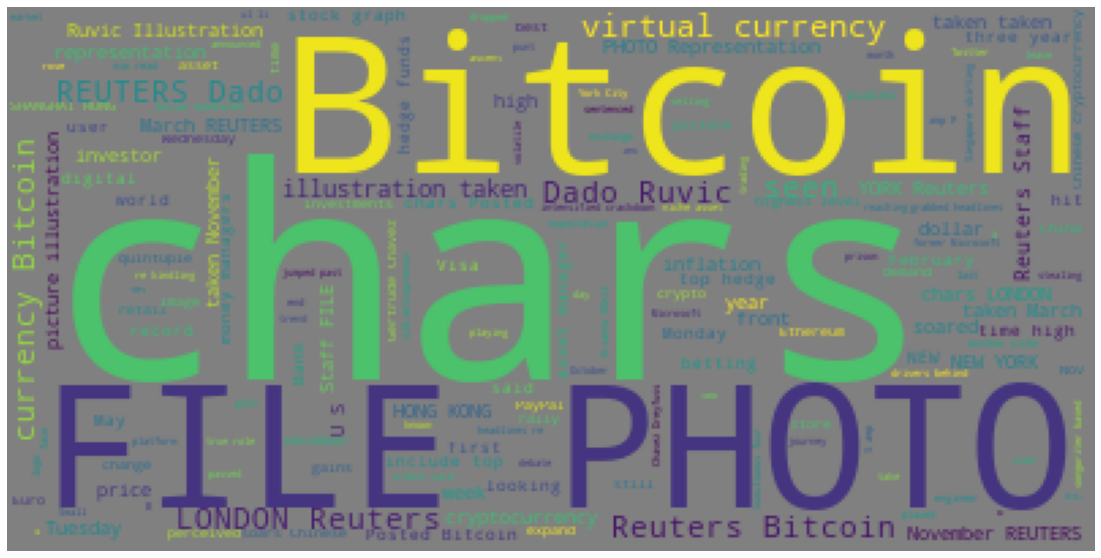

In [74]:
# Generate the Bitcoin word cloud
cloud1 = WordCloud(background_color='grey').generate(bitcoin_df.text.str.cat())
cloud1
plt.axis("off")
plt.imshow(cloud1)

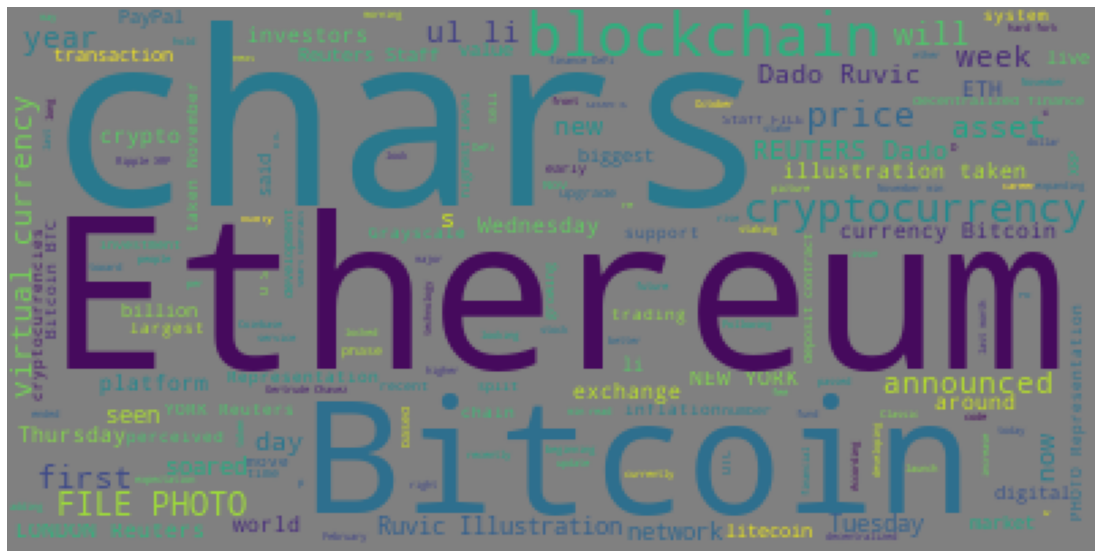

In [75]:
# Generate the Ethereum word cloud
cloud2 = WordCloud(background_color='grey').generate(ethereum_df.text.str.cat())
cloud2
plt.axis("off")
plt.imshow(cloud2)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [76]:
import spacy
from spacy import displacy

In [77]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [78]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [81]:
# Concatenate all of the Bitcoin text together
all_concat_bitcoin = bitcoin_df.text.str.cat()
all_concat_bitcoin


"A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars]Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives the c

In [82]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(all_concat_bitcoin)
bitcoin_doc
bitcoin_doc.user_data["Title"] = "Bitcoin NER"

In [83]:
# Render the visualization
displacy.render(bitcoin_doc, style = 'ent')


In [84]:
# List all Entities
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
2016 to 2018 DATE
first ORDINAL
Bitcoin GPE
US GPE
first ORDINAL
US GPE
October DATE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
chars]4 FAC
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
$1 billion MONEY
Silk Road ORG
Ross Ulbricht PERSON
this week DATE
chars]1 CARDINAL
1 CARDINAL
Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
chars]8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
evening TIME
December 2017 DATE
this week DATE
more than $18,000 MONEY
Bitcoin GPE
March 13, 2020 DATE
REUTER

---

### Ethereum NER

In [87]:
# Concatenate all of the Ethereum text together
all_concat_ethereum = ethereum_df.text.str.cat()
all_concat_ethereum

'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]PayPal has launched the Generosity Network, a platform that allows users to create customized, personal fundraising campaigns. Yes, just l

In [88]:
# Run the NER processor on all of the text
ethereum_doc = nlp(all_concat_ethereum)
ethereum_doc
ethereum_doc.user_data["Title"] = "Ethereum NER"

In [89]:
# Render the visualization
displacy.render(ethereum_doc, style = 'ent')


In [90]:
# List all Entities
for i in ethereum_doc.ents:
    print(i.text, i.label_)

PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
XRP ORG
Monday DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
chars]The New York Times ORG
Coinbase ORG
early February this year DATE
last month DATE
October DATE
$24 million MONEY
8, 2020 DATE
5 min QUANTITY
ICO ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Hedera ORG
Syrians NORP
Hala Systems ORG
Paypal PERSON
1 CARDINAL
Bitcoin GPE
Ethereum GPE
bitcoin GPE
Payp PERSON
Bitcoin GPE
the Plug and Play Tech Center ORG
Sunnyvale GPE
C

---